In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/sales_data_with_discounts.csv')

In [5]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [6]:
df.shape

(450, 13)

In [7]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)


Numerical columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [11]:
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]
std_dev_values = df[numerical_columns].std()

print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)
print("Standard Deviation:\n", std_dev_values)


Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


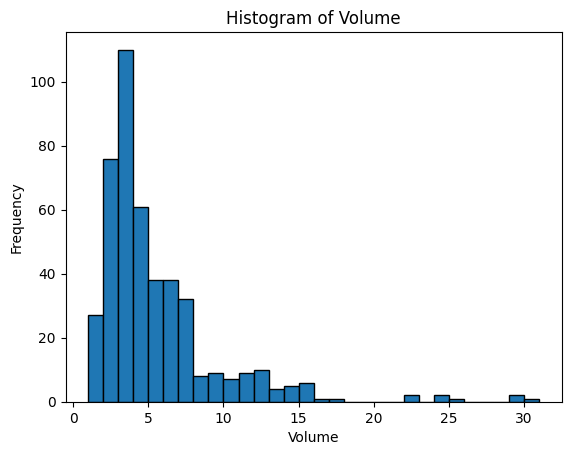

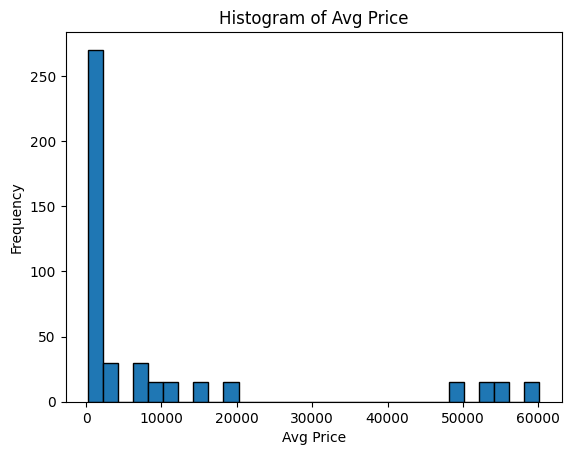

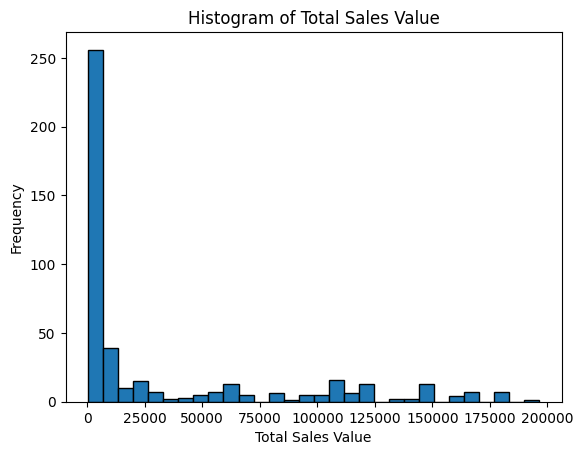

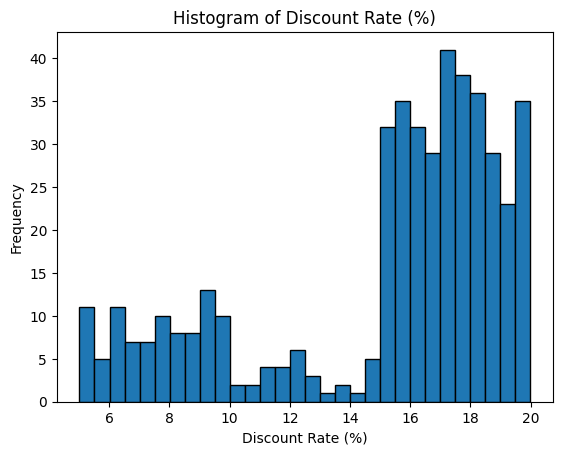

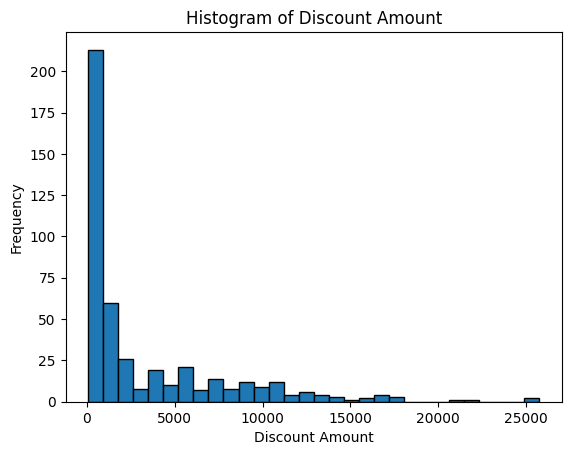

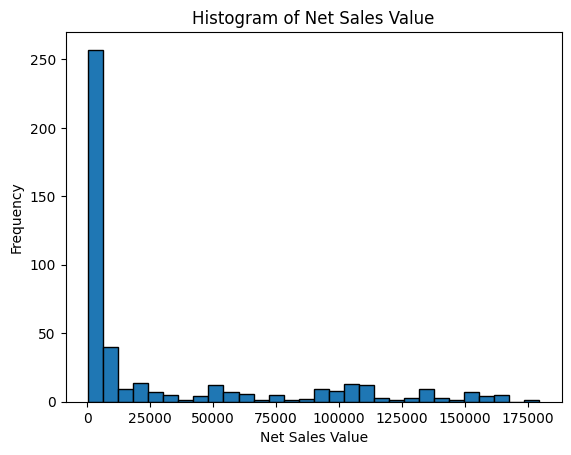

In [12]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.hist(df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


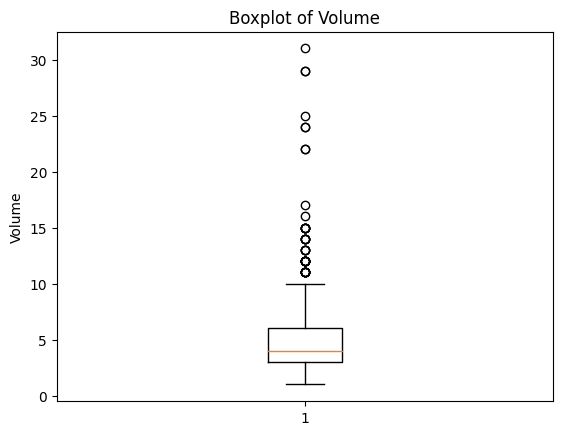

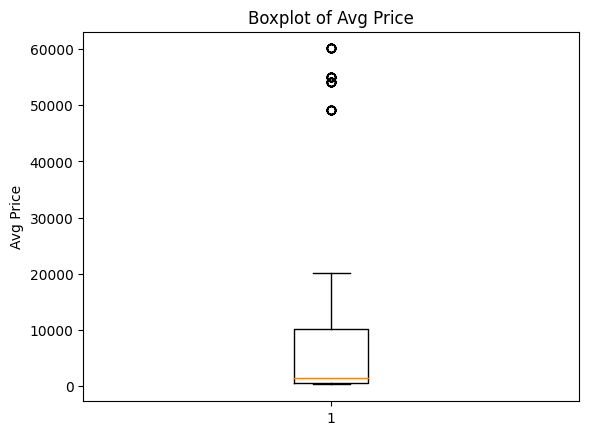

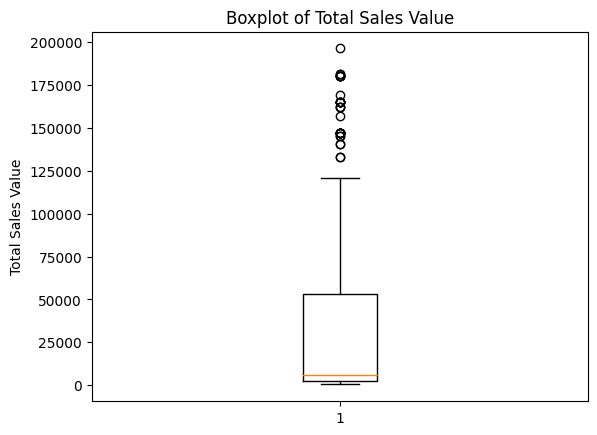

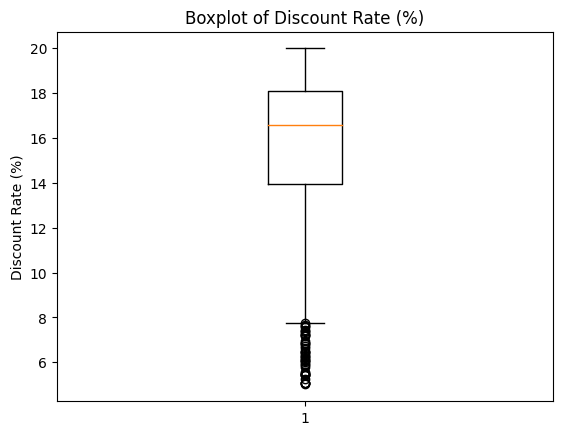

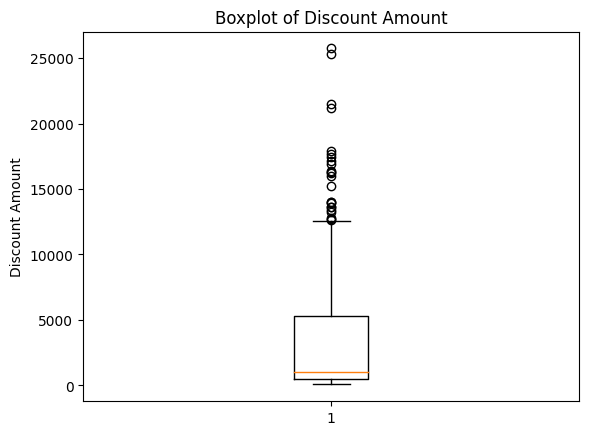

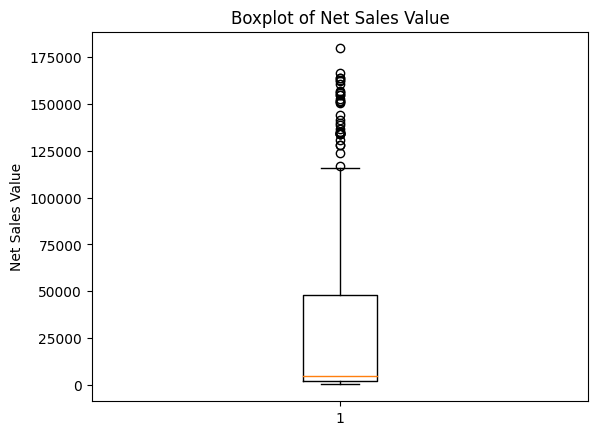

In [13]:
for column in numerical_columns:
    plt.boxplot(df[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


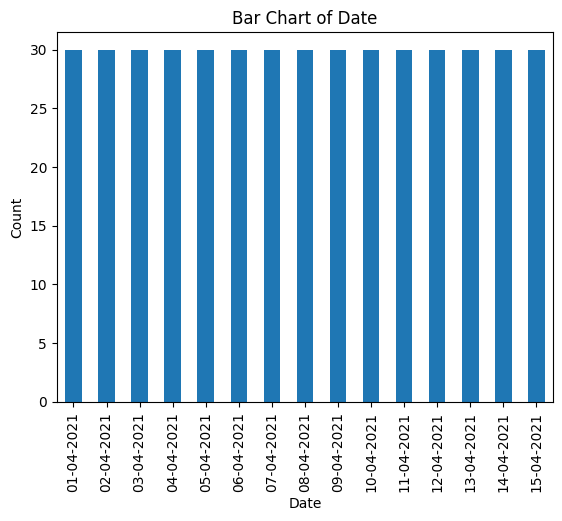

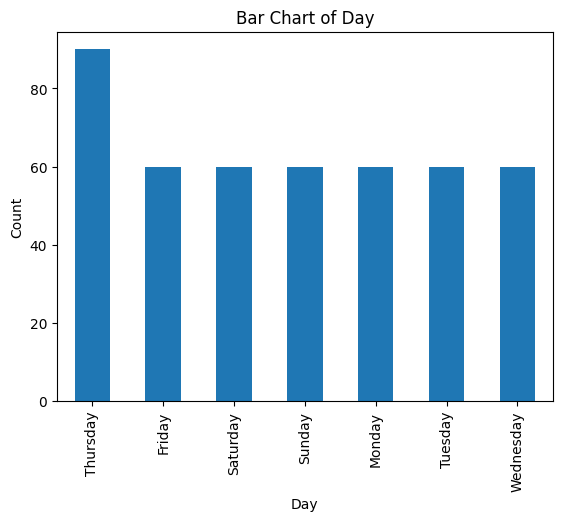

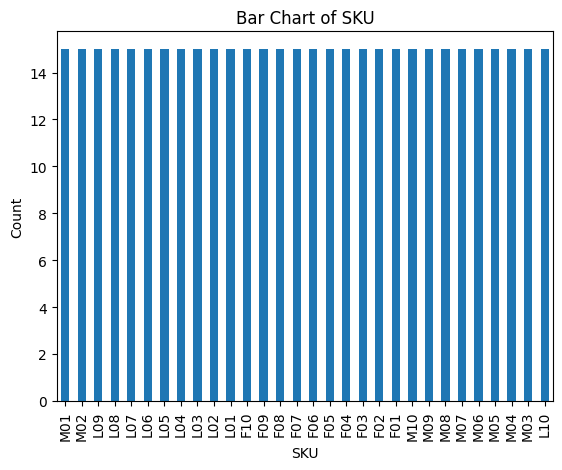

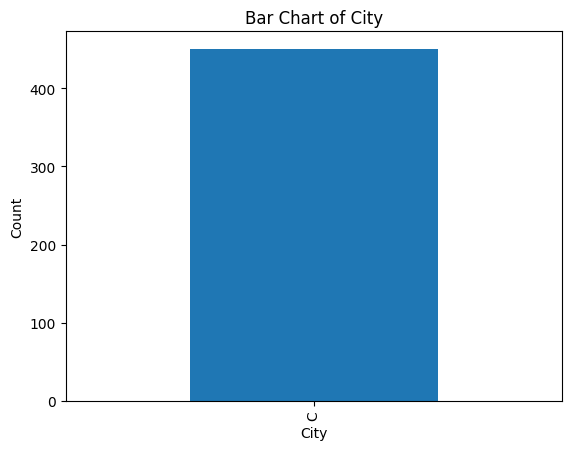

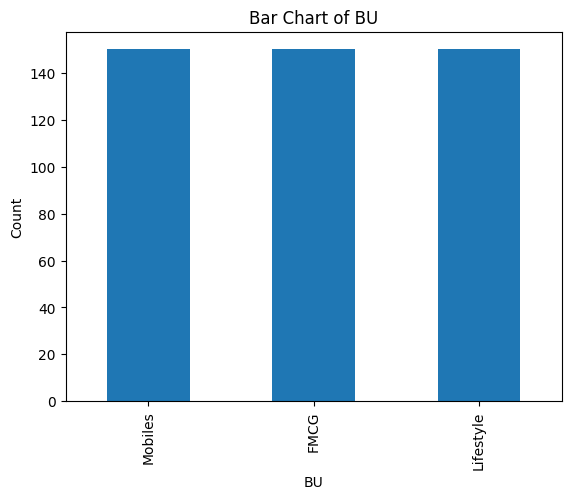

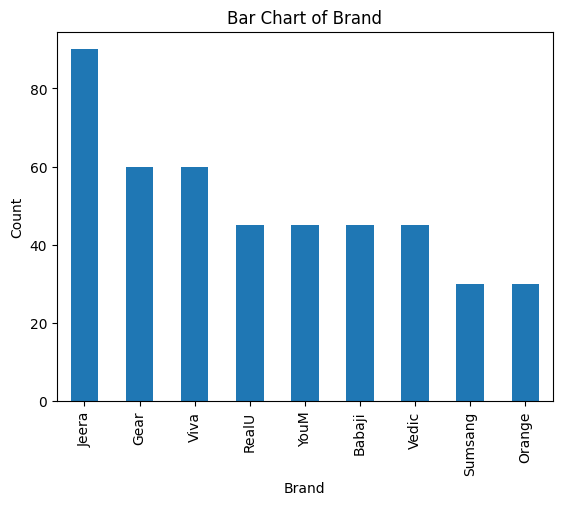

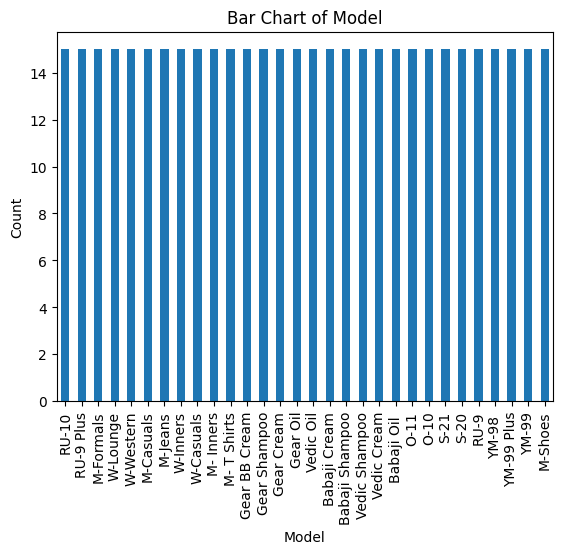

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Showing before and after comparisons
print("Before standardization:\n", df[numerical_columns].head())
print("After standardization:\n", df_standardized[numerical_columns].head())


Before standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
After standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146    

In [16]:
df_transformed = pd.get_dummies(df, columns=categorical_columns)

# Display a portion of the transformed dataset
print(df_transformed.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [17]:
summary = """
Key Findings:
1. Descriptive statistics (mean, median, mode, and standard deviation) provided insights into the central tendency and dispersion of numerical columns.
2. Histograms and boxplots revealed the distribution and presence of outliers in the numerical data.
3. Bar charts highlighted the distribution of categorical variables.
4. Standardization transformed numerical data for uniformity, which is beneficial for analytical models.
5. One-hot encoding converted categorical variables into a machine-learning-friendly format.
"""

print(summary)



Key Findings:
1. Descriptive statistics (mean, median, mode, and standard deviation) provided insights into the central tendency and dispersion of numerical columns.
2. Histograms and boxplots revealed the distribution and presence of outliers in the numerical data.
3. Bar charts highlighted the distribution of categorical variables.
4. Standardization transformed numerical data for uniformity, which is beneficial for analytical models.
5. One-hot encoding converted categorical variables into a machine-learning-friendly format.

